In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as np
import numpy as np
from tensorflow import keras
import os
import matplotlib.image as mpimg


from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout,Flatten,Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
Train = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/train',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))

Found 5217 files belonging to 2 classes.


In [ ]:
Test = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/test',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))

Found 634 files belonging to 2 classes.


In [ ]:
Validation = keras.utils.image_dataset_from_directory(
    directory= '/content/drive/MyDrive/val',
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256, 256))

Found 16 files belonging to 2 classes.


In [ ]:
path = '/content/drive/MyDrive/train'
classes = os.listdir(path)
print(classes)

['PNEUMONIA', 'NORMAL']


In [ ]:
PNEUMONIA_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])

pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)

print('il y a', len(pneumonia_names),
      'd''images qui sont infecter par la pneumonie dans le  training dataset')
print('il y a ', len(normal_names), 'd''image normaux in training dataset')

il y a 3875 dimages qui sont infecter par la pneumonie dans le  training dataset
il y a  1342 dimage normaux in training dataset


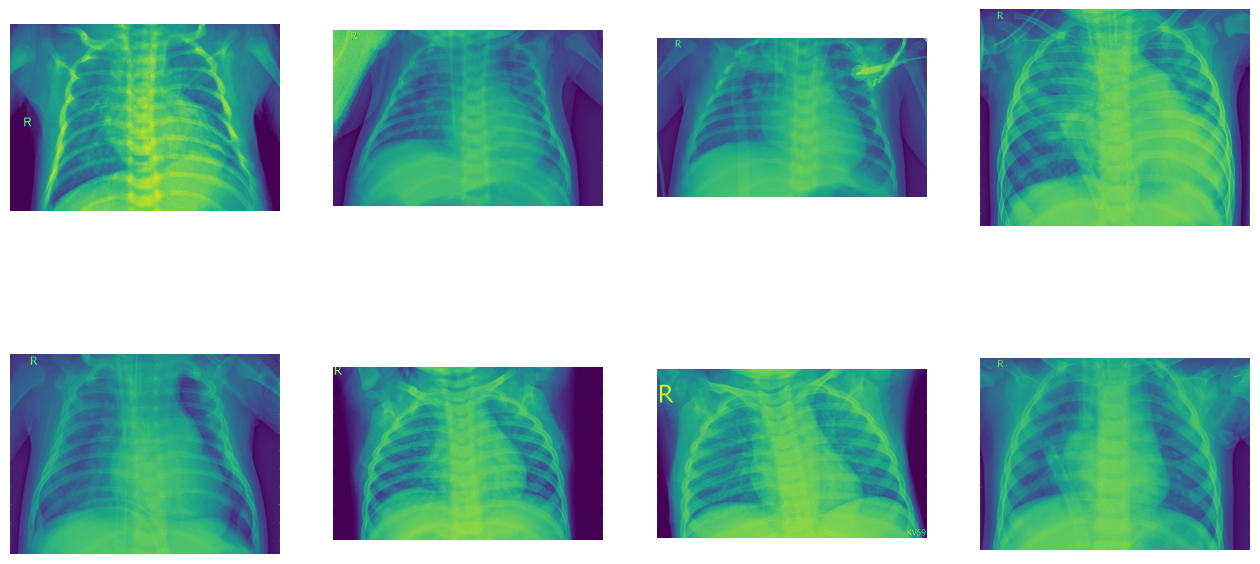

In [ ]:

fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index = 210

pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
                    for fname in pneumonia_names[pic_index-8:pic_index]]
for i, img_path in enumerate(pneumonia_images):
    sp = plt.subplot(2, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

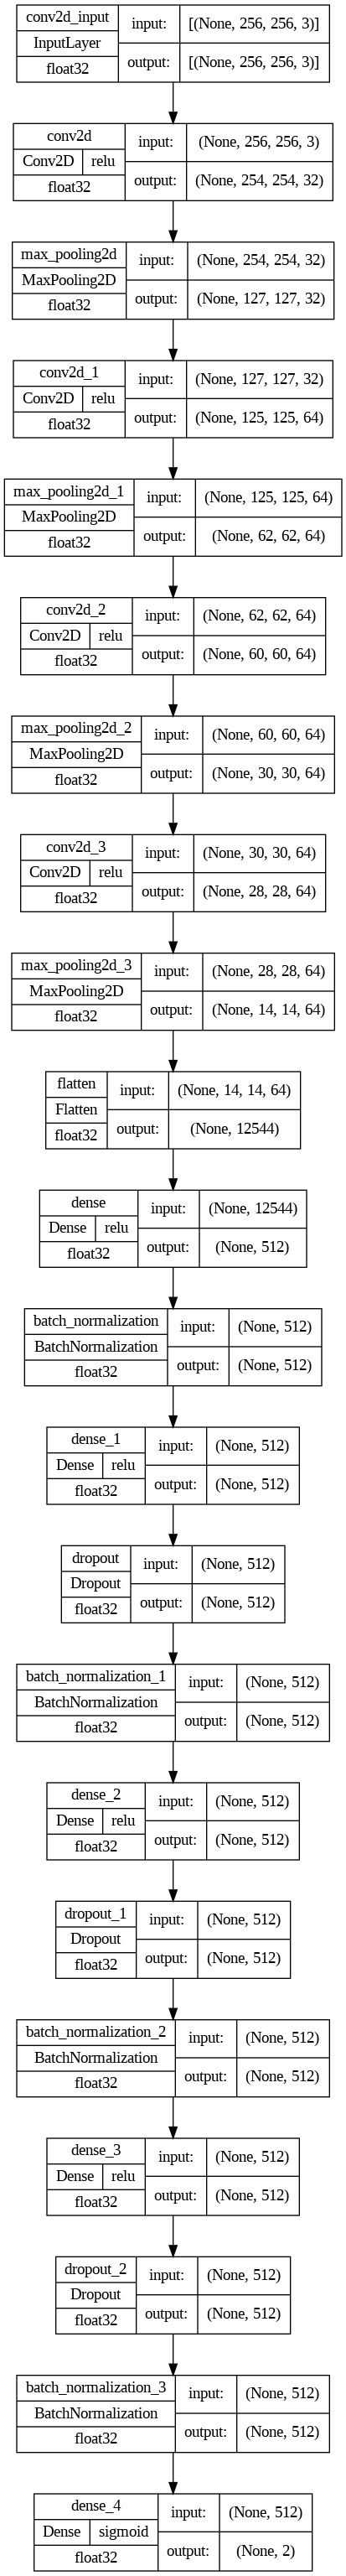

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer ='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(Train, epochs =2, validation_data = Validation)

Epoch 1/2
164/164 [==============================] - 987s 5s/step - loss: 0.2296 - accuracy: 0.9268 - val_loss: 9.2249 - val_accuracy: 0.5000
Epoch 2/2
164/164 [==============================] - 739s 4s/step - loss: 0.1406 - accuracy: 0.9536 - val_loss: 0.4291 - val_accuracy: 0.8125


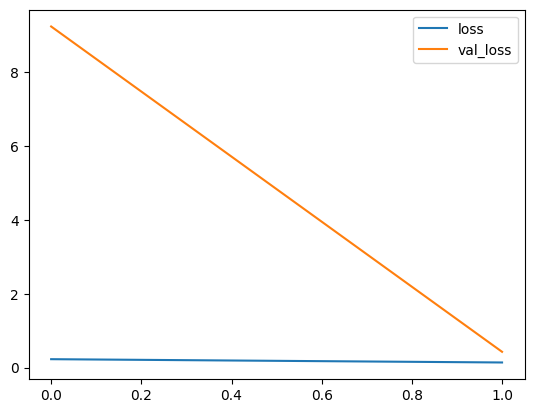

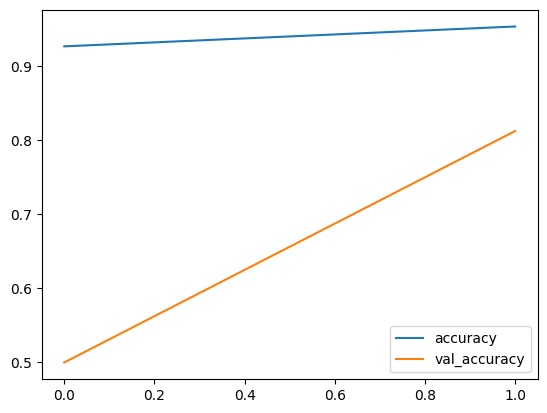

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()